In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset

In [213]:
df = pd.read_csv('hour.csv', index_col='instant')
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [215]:
categories_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'C', 'cnt']
date_columns = ['dteday']

In [216]:
mixed_indexes = np.random.permutation(len(df))

In [217]:
train_size = int(0.8 * len(df))
df_train = df.iloc[ mixed_indexes, : ][:train_size]
df_test = df.iloc[ mixed_indexes, : ][train_size:]
df_train.shape[0] + df_test.shape[0] == df.shape[0]

True

Future preprocessing for train. Pipeline for test preprocessing will be created later

# Data analysis

Drop casual and registered as terms of cnt

In [218]:
df_train = df_train.drop(['casual', 'registered'], axis=1)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [219]:
X_train = df_train.drop(['cnt'], axis=1)
y_train = df_train.loc[:, 'cnt']
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,,
2671,2011-04-26,2,0,4,4,0,2,1,1,0.56,0.5303,0.83,0.2537
960,2011-02-12,1,0,2,14,0,6,0,1,0.34,0.3182,0.31,0.2836
16446,2012-11-22,4,1,11,23,1,4,0,1,0.30,0.3333,0.70,0.0000
11451,2012-04-27,2,1,4,7,0,5,1,1,0.38,0.3939,0.50,0.2836
8490,2011-12-25,1,0,12,10,0,0,0,1,0.26,0.2424,0.81,0.2537


In [220]:
y_train.head()

instant
13874    141
8420     145
13746    257
8001      24
8513      70
Name: cnt, dtype: int64

<AxesSubplot:>

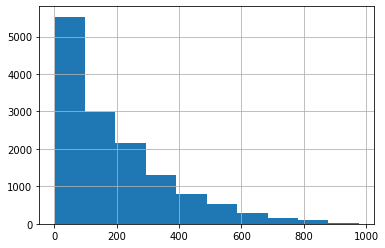

In [221]:
y_train.hist()

Drop dteday because in year, month

In [222]:
X_train = X_train.drop('dteday', axis=1)
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,
13874,3,1,8,6,0,1,1,2,0.70,0.6667,0.79,0.2239
8420,1,0,12,11,0,4,1,2,0.44,0.4394,0.77,0.0000
13746,3,1,7,22,0,2,1,1,0.68,0.6364,0.74,0.2537
8001,4,0,12,0,0,1,1,1,0.32,0.3333,0.87,0.0896
8513,1,0,12,10,1,1,0,1,0.34,0.2879,0.42,0.5224


## Correlation analysis

<AxesSubplot:>

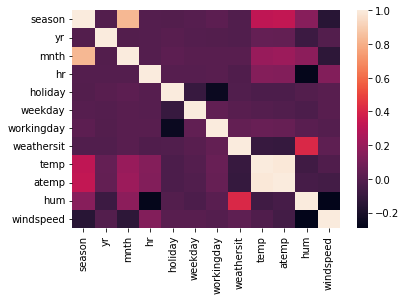

In [223]:
sns.heatmap(X_train.corr())

High correlation: season and month, temp and atemp. Drop temp

In [224]:
X_train = X_train.drop('temp', axis=1)
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
instant,,,,,,,,,,,
13874,3,1,8,6,0,1,1,2,0.6667,0.79,0.2239
8420,1,0,12,11,0,4,1,2,0.4394,0.77,0.0000
13746,3,1,7,22,0,2,1,1,0.6364,0.74,0.2537
8001,4,0,12,0,0,1,1,1,0.3333,0.87,0.0896
8513,1,0,12,10,1,1,0,1,0.2879,0.42,0.5224


In [225]:
pca = PCA(n_components=1)
temp = X_train.loc[:, ['season', 'mnth']]
temp['year_season'] = pca.fit_transform(temp)
X_train = X_train.drop(['season', 'mnth'], axis=1)
X_train['year_season'] = temp['year_season'] 
X_train.head()

,yr,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,year_season
instant,,,,,,,,,,
13874,1,6,0,1,1,2,0.6667,0.79,0.2239,-1.546638
8420,0,11,0,4,1,2,0.4394,0.77,0.0000,-4.874801
13746,1,22,0,2,1,1,0.6364,0.74,0.2537,-0.582286
8001,0,0,0,1,1,1,0.3333,0.87,0.0896,-5.668669
8513,0,10,1,1,0,1,0.2879,0.42,0.5224,-4.874801


In [226]:
X_train.loc[:, 'hum'] = StandardScaler().fit_transform(X_train.loc[:, 'hum'].values.reshape(-1, 1))
X_train.loc[:, 'windspeed'] = StandardScaler().fit_transform(X_train.loc[:, 'windspeed'].values.reshape(-1, 1))
X_train.loc[:, 'year_season'] = StandardScaler().fit_transform(X_train.loc[:, 'year_season'].values.reshape(-1, 1))
X_train.head()

,yr,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,year_season
instant,,,,,,,,,,
13874,1,6,0,1,1,2,0.6667,0.851120,0.279285,-0.434940
8420,0,11,0,4,1,2,0.4394,0.747302,-1.552793,-1.370875
13746,1,22,0,2,1,1,0.6364,0.591574,0.523126,-0.163748
8001,0,0,0,1,1,1,0.3333,1.266394,-0.819634,-1.594123
8513,0,10,1,1,0,1,0.2879,-1.069521,2.721783,-1.370875


## Dummies for categorical

In [227]:
df_weekday_dummies = pd.get_dummies(X_train['weekday'], prefix='weekday')
df_weekday_dummies

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,
13874,0,1,0,0,0,0,0
8420,0,0,0,0,1,0,0
13746,0,0,1,0,0,0,0
8001,0,1,0,0,0,0,0
8513,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
6979,1,0,0,0,0,0,0
10604,0,0,0,0,1,0,0
16337,1,0,0,0,0,0,0


In [228]:
X_train = pd.concat([X_train, df_weekday_dummies], axis=1).drop('weekday', axis=1)
X_train

,yr,hr,holiday,workingday,weathersit,atemp,hum,windspeed,year_season,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,,,,,,,,,,
13874,1,6,0,1,2,0.6667,0.851120,0.279285,-0.434940,0,1,0,0,0,0,0
8420,0,11,0,1,2,0.4394,0.747302,-1.552793,-1.370875,0,0,0,0,1,0,0
13746,1,22,0,1,1,0.6364,0.591574,0.523126,-0.163748,0,0,1,0,0,0,0
8001,0,0,0,1,1,0.3333,1.266394,-0.819634,-1.594123,0,1,0,0,0,0,0
8513,0,10,1,0,1,0.2879,-1.069521,2.721783,-1.370875,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,0,9,0,0,1,0.4091,0.695392,-1.552793,-1.051740,1,0,0,0,0,0,0
10604,1,22,0,1,1,0.5303,1.058757,0.034626,0.995435,0,0,0,0,1,0,0
16337,1,10,0,0,1,0.3030,0.176300,0.889705,-1.322932,1,0,0,0,0,0,0


In [229]:
df_weathersit_dummies = pd.get_dummies(X_train['weathersit'], prefix='weathersit')
X_train = pd.concat([X_train, df_weathersit_dummies], axis=1).drop('weathersit', axis=1)
X_train

,yr,hr,holiday,workingday,atemp,hum,windspeed,year_season,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,
13874,1,6,0,1,0.6667,0.851120,0.279285,-0.434940,0,1,0,0,0,0,0,0,1,0,0
8420,0,11,0,1,0.4394,0.747302,-1.552793,-1.370875,0,0,0,0,1,0,0,0,1,0,0
13746,1,22,0,1,0.6364,0.591574,0.523126,-0.163748,0,0,1,0,0,0,0,1,0,0,0
8001,0,0,0,1,0.3333,1.266394,-0.819634,-1.594123,0,1,0,0,0,0,0,1,0,0,0
8513,0,10,1,0,0.2879,-1.069521,2.721783,-1.370875,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,0,9,0,0,0.4091,0.695392,-1.552793,-1.051740,1,0,0,0,0,0,0,1,0,0,0
10604,1,22,0,1,0.5303,1.058757,0.034626,0.995435,0,0,0,0,1,0,0,1,0,0,0
16337,1,10,0,0,0.3030,0.176300,0.889705,-1.322932,1,0,0,0,0,0,0,1,0,0,0
